# Importing packages and reading data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

# Exploratory Data Analysis

In [3]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [4]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## Dataset is balanced as it contains similar number of  games won for both red and blue teams

Text(0, 0.5, 'Win Count')

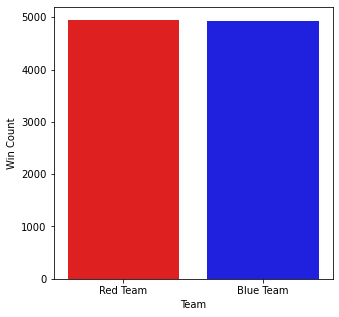

In [5]:
plt.figure(figsize=(5,5))
sns.countplot(x = df.blueWins, palette = ['red', 'blue'])

plt.xticks([0,1], ['Red Team', 'Blue Team'])
plt.xlabel("Team")
plt.ylabel("Win Count")

# Cleaning dataset by removing outliers

In [6]:
df_clean = df.copy()

# Removing outliers - games with excessive amount of words placed/destroyed, or deaths given to the opposing team

df_clean = df_clean.loc[df_clean['blueWardsPlaced'] <= np.quantile(df_clean['blueWardsPlaced'], q=0.99)]
df_clean = df_clean.loc[df_clean['redWardsPlaced'] <= np.quantile(df_clean['redWardsPlaced'], q=0.99)]

df_clean = df_clean.loc[df_clean['blueWardsDestroyed'] <= np.quantile(df_clean['blueWardsDestroyed'], q=0.99)]
df_clean = df_clean.loc[df_clean['redWardsDestroyed'] <= np.quantile(df_clean['redWardsDestroyed'], q=0.99)]

df_clean = df_clean.loc[df_clean['blueDeaths'] <= np.quantile(df_clean['blueDeaths'], q=0.99)]
df_clean = df_clean.loc[df_clean['redDeaths'] <= np.quantile(df_clean['redDeaths'], q=0.99)]

# Feature engineering - creating mixed feature from Kills and Assists

In [7]:
df_clean['blueKillsAssists'] = df_clean['blueKills'] + df_clean['blueAssists']
df_clean['redKillsAssists'] = df_clean['redKills'] + df_clean['redAssists']

# Dropping features where there is colinerality

In [8]:
df_clean.drop(columns = ['gameId', 'blueKills', 'blueAssists',
                         'redKills', 'redAssists',
                        'blueExperienceDiff', 'redExperienceDiff',
                        'blueCSPerMin', 'redCSPerMin',
                        'blueGoldPerMin', 'redGoldPerMin',
                        'blueGoldDiff', 'redGoldDiff',
                        'blueTotalGold', 'redTotalGold',
                        'blueTotalExperience', 'redTotalExperience',
                        'blueEliteMonsters', 'redEliteMonsters'], inplace = True)

In [9]:
df_clean.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,...,redFirstBlood,redDeaths,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,blueKillsAssists,redKillsAssists
count,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,...,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000
mean,0.497703,20.972866,2.704305,0.503579,6.075099,0.360859,0.187053,0.049140,6.913984,216.821066,...,0.496421,6.096357,0.414806,0.159705,0.043051,6.925542,217.625467,51.383827,12.648649,12.675783
std,0.500021,13.740976,1.730431,0.500014,2.835071,0.480275,0.389975,0.237372,0.299975,21.684966,...,0.500014,2.872227,0.492715,0.366352,0.217221,0.301673,21.631482,10.047238,6.467997,6.463962
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,107.000000,4.000000,0.000000,0.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,6.800000,203.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,6.800000,204.000000,44.000000,8.000000,8.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,7.000000,218.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,7.000000,218.000000,51.000000,12.000000,12.000000
75%,1.000000,19.000000,4.000000,1.000000,8.000000,1.000000,0.000000,0.000000,7.200000,232.000000,...,1.000000,8.000000,1.000000,0.000000,0.000000,7.200000,233.000000,57.000000,17.000000,17.000000
max,1.000000,105.000000,11.000000,1.000000,14.000000,1.000000,1.000000,4.000000,8.000000,283.000000,...,1.000000,14.000000,1.000000,1.000000,2.000000,8.200000,289.000000,92.000000,40.000000,39.000000


In [10]:
df_blue = df_clean.loc[:, ~df_clean.columns.str.startswith('red')]
# df_red = df_clean.loc[:, ~df_clean.columns.str.startswith('blue')]

## Blue Dataset

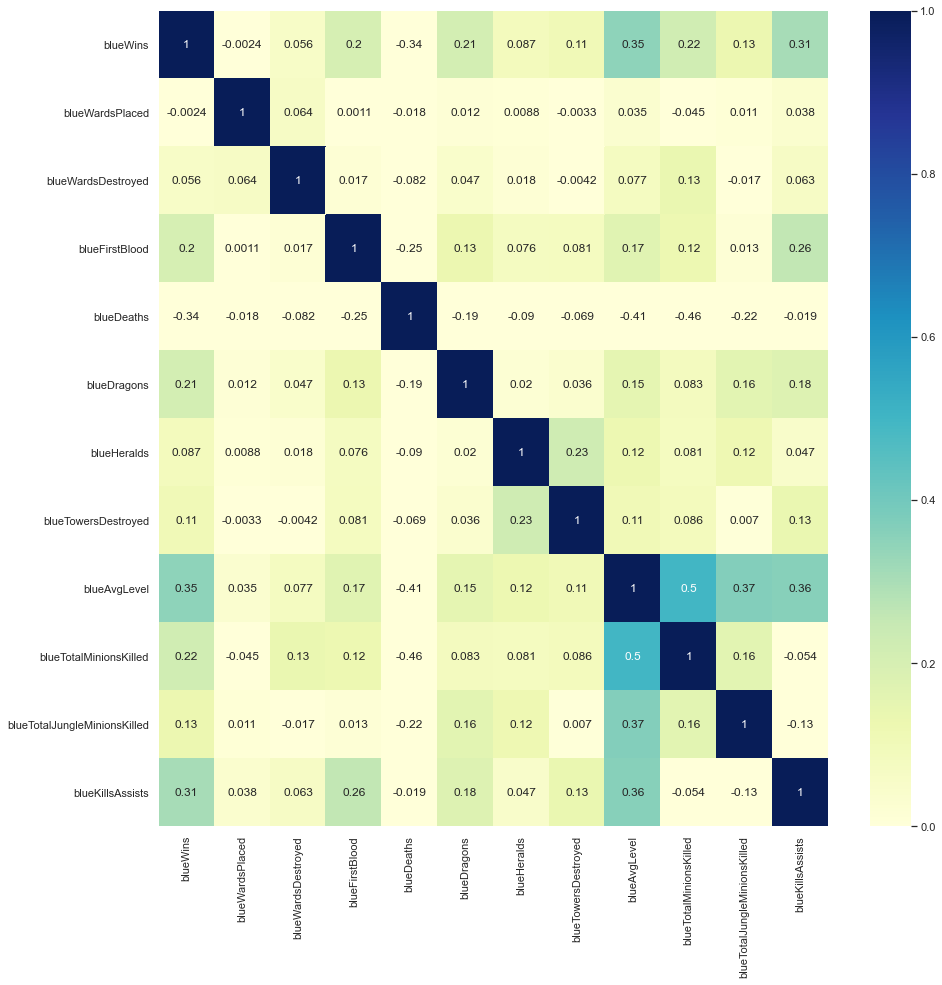

In [11]:
plt.figure(figsize=(15,15))

sns.set()

ax = sns.heatmap(df_blue.corr(), annot=True, vmin=0, vmax = 1, cmap='YlGnBu')
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
X = df_blue.drop(columns=['blueWins'])
y = df_blue['blueWins']

In [14]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [15]:
logReg = LogisticRegression()
logReg.fit(X_scaled, y)

logReg.score(X_scaled, y)

0.7114624505928854

In [16]:
feature_weights = pd.DataFrame()
feature_weights['Features'] = X.columns
feature_weights['Weights'] = logReg.coef_.reshape(11, 1)

feature_weights.sort_values(by='Weights', ascending = False, inplace = True)
feature_weights

,Features,Weights
10,blueKillsAssists,3.955292
7,blueAvgLevel,2.703053
6,blueTowersDestroyed,1.664100
8,blueTotalMinionsKilled,1.352422
9,blueTotalJungleMinionsKilled,1.221011
4,blueDragons,0.474541
2,blueFirstBlood,0.186092
5,blueHeralds,0.128879
1,blueWardsDestroyed,0.094901
0,blueWardsPlaced,-0.355087


## Having more Kills and Assists has the largest contribution to whether a team wins or loses a game

-

# Effects of dragon and herald on game result

## Obtaining first dragon kill on game result

In [18]:
dragon_none = df_blue.loc[df_blue['blueDragons']==0]['blueWins'].sum() / df_blue.loc[df_blue['blueDragons']==0].shape[0]

dragon_first = df_blue.loc[df_blue['blueDragons']==1]['blueWins'].sum() / df_blue.loc[df_blue['blueDragons']==1].shape[0]

print(dragon_none, dragon_first)

0.4183519973257563 0.6382474837181764


### Without securing the first dragon, the blue team won 41.8% of games
### After securing the first dragon, win rate increased to 63.8%

-

## Obtaining first herald kill on game result

In [20]:
herald_none = df_blue.loc[df_blue['blueHeralds']==0]['blueWins'].sum() / df_blue.loc[df_blue['blueHeralds']==0].shape[0]

herald_first = df_blue.loc[df_blue['blueHeralds']==1]['blueWins'].sum() /  df_blue.loc[df_blue['blueHeralds']==1].shape[0]

print(herald_none, herald_first)

0.4767411300919842 0.5888063963449457


### Without securing the first herald, the blue team won 47.7% of games
### After securing the first herald, win rate increased to 58.9%

-

# Conclusions

In terms of overall gameplay results, having more Kills and Assists results in a higher change of winning the match.

This is expected as kills and assists grants gold, which allows the team to be stronger through purchasing items. Having a stronger team means that team is more likely to win the match

### Securing dragons and heralds both contribute to winning a match

Having the first dragon increases the chances of victory by 52.6%

Compared to the first herald, which increases the change of victory by 23.5%